# Challenge Set 3: Linear Regression and Train/Test Split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.linear_model import LinearRegression
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance

%matplotlib inline

/Users/KVASU/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../../2013_movies.csv')

In [3]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,11/22/13 0:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,5/3/13 0:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,11/22/13 0:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,7/3/13 0:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,6/14/13 0:00


Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.)

### Exercise 3.1

Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [4]:
df['Constant'] = 1

X = df['Constant']
y = df['DomesticTotalGross']

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Mon, 17 Oct 2016   Prob (F-statistic):                nan
Time:                        17:10:26   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

A constant cannot predict a continuous variable.

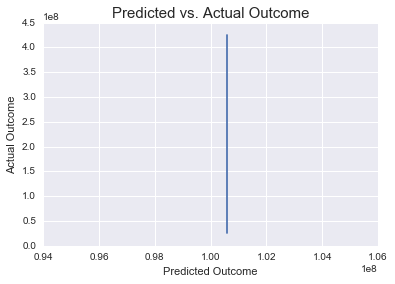

In [5]:
y_pred = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.plot(y_pred, y);

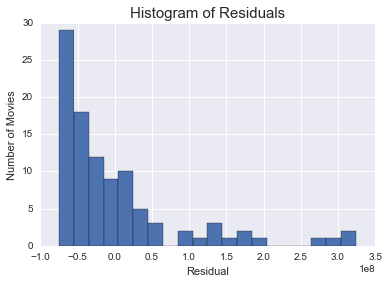

In [6]:
resid = y - fit.predict(X)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(resid, bins = 20, normed=0);

Residuals are distributed all over. Most around -1 x 10^8.

### Exercise 3.2

Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [7]:
df2 = df
df2 = df2[np.isfinite(df2['Budget'])]

X = df2[['Constant','Budget']]
y = df2['DomesticTotalGross']


model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Mon, 17 Oct 2016   Prob (F-statistic):           6.80e-08
Time:                        17:10:27   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant     4.44e+07   1.27e+07      3.504      0.001      1.92e+07  6.96e+07
Budget         0.7846      0.133      5.901      0.000         0.520     1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     1.54e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

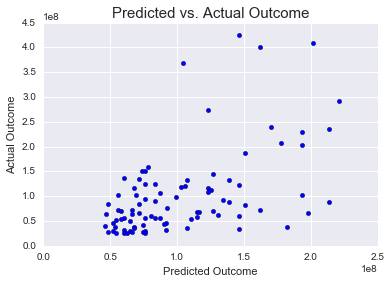

In [8]:
y_pred = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.scatter(y_pred, y);

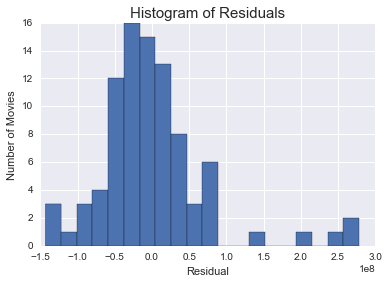

In [9]:
resid = y - fit.predict(X)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(resid, bins = 20, normed=0);

Residuals are better. More are near 0. 

### Exercise 3.3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [10]:
df_dummied = pd.get_dummies(df['Rating'],dummy_na=False)
df = df.join(df_dummied)

In [11]:
df3 = df
df3 = df3[np.isfinite(df3['Budget'])]

X = df3[['Constant','Budget','G','PG','PG-13','R']]
y = df3['DomesticTotalGross']


model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Mon, 17 Oct 2016   Prob (F-statistic):           1.87e-06
Time:                        17:10:27   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Constant    3.551e+07   1.09e+07      3.270      0.002      1.39e+07  5.71e+07
Budget         0.7816      0.152      5.157      0.000         0.480     1.083
G          -3.398e-09   1.31e-09     -2.602      0.011        -6e-09 -8.01e-10
PG          2.221e+07   1.61e+07      1.380      0.171      -9.8e+06  5.42e+07
PG-13       4.946e+06   1.21e+07      0.410      0.683     -1.91e+07   2.9e+07
R           8.347e+06   1.16e+07      0.719      0.474     -1.47e+07  3.14e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                     8.12e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

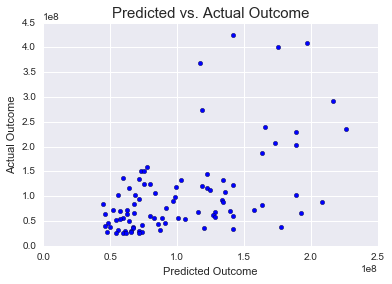

In [12]:
y_pred = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.scatter(y_pred, y);

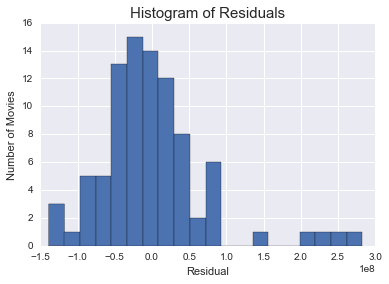

In [13]:
resid = y - fit.predict(X)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(resid, bins = 20, normed=0);

Only got slightly better this time, inserting budget was a much bigger shift than including rating.

### Exercise 3.4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [14]:
df_dummied2 = pd.get_dummies(df['Director'],dummy_na=False)
df = df.join(df_dummied2)


In [16]:
df4 = df
df4 = df4[np.isfinite(df4['Budget'])]

X = df4[['Constant','Budget','Runtime','G','PG','PG-13','R','Woody Allen']]
y = df4['DomesticTotalGross']


model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Mon, 17 Oct 2016   Prob (F-statistic):           3.77e-06
Time:                        17:10:46   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Constant    -1.012e+07   4.05e+07     -0.250      0.803     -9.08e+07  7.05e+07
Budget          0.7036      0.165      4.255      0.000         0.375     1.032
Runtime      6.083e+05   5.21e+05      1.168      0.246     -4.27e+05  1.64e+06
G           -5.298e-09   9.43e-09     -0.562      0.576     -2.41e-08  1.35e-08
PG           1.438e+07   1.74e+07      0.826      0.411     -2.02e+07   4.9e+07
PG-13       -1.342e+07   1.98e+07     -0.677      0.500     -5.28e+07   2.6e+07
R           -1.109e+07   2.03e+07     -0.547      0.586     -5.14e+07  2.92e+07
Woody Allen          0          0        nan        nan             0         0
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

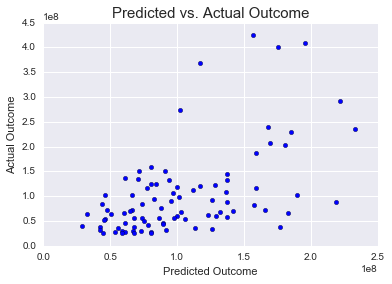

In [17]:
y_pred = fit.predict(X)
plt.title('Predicted vs. Actual Outcome', fontsize = 15)
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.scatter(y_pred, y);

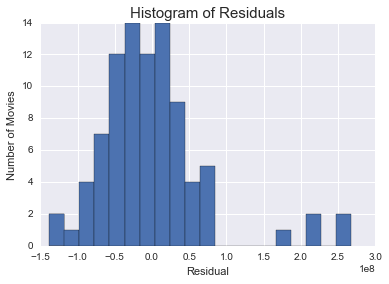

In [18]:
resid = y - fit.predict(X)
plt.title('Histogram of Residuals', fontsize=15)
plt.xlabel('Residual')
plt.ylabel('Number of Movies')
plt.hist(resid, bins = 20, normed=0);

### Exercise 3.5

Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

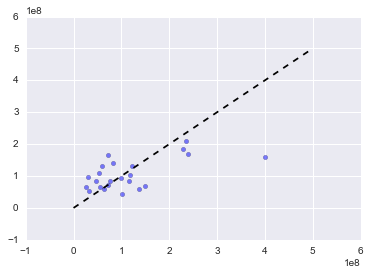

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model_lr = LinearRegression(fit_intercept=True)
model_lr.fit(X_train, y_train)
pred_vals_lr = model_lr.predict(X_test)


temp = np.linspace(0,500000000,500)
plt.scatter(y_test,pred_vals_lr,alpha=.5)
plt.plot(temp,temp,'k--')